<a href="https://colab.research.google.com/github/priyankkhanna2001/course-work/blob/courses/Machine%20Learning%20A-Z%20(Codes%20and%20Datasets)/Part%202%20-%20Regression/Section%207%20-%20Support%20Vector%20Regression%20(SVR)/Python/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [33]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [34]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [35]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [36]:
#done because standardscalar expects a 2D array
y = y.reshape(len(y),1)

In [37]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [38]:
#feature scaling neccesary as x,y are implicit here
from sklearn.preprocessing import StandardScaler
scx=StandardScaler()
scy=StandardScaler()
sx = scx.fit_transform(x)
sy = scy.fit_transform(y)

In [39]:
print(sx)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [40]:
print(sy)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [41]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')#gausian rbf kernel
regressor.fit(sx,sy)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [42]:
#inverse transform is to revert feature scaling
scy.inverse_transform(regressor.predict(scx.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

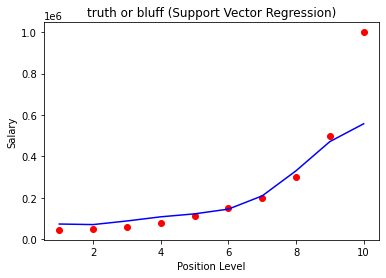

In [52]:
plt.scatter(x,y,color = 'red')
plt.plot(x,scy.inverse_transform(regressor.predict(sx)),color = 'blue')
plt.title('truth or bluff (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

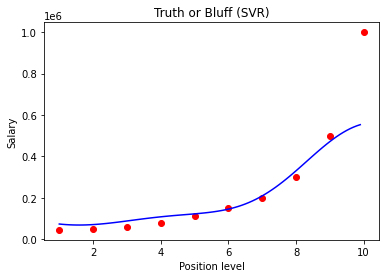

In [54]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x,y, color = 'red')
plt.plot(x_grid, scy.inverse_transform(regressor.predict(scx.transform(x_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [55]:
regressor.dual_coef_

array([[-0.5517706 , -0.23027193, -1.        ,  0.78204253,  1.        ]])

In [56]:
regressor.intercept_

array([0.01158103])